In [17]:
# 1. Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [18]:
# 2. Configuración visual y semilla aleatoria
plt.style.use('seaborn-v0_8')
np.random.seed(42)

In [19]:
#3. Generación de datos simulados

def generar_datos_pa(n=300):
    edad = np.random.randint(18, 81, size=n)
    imc = np.random.normal(27, 4, size=n)
    imc = np.clip(imc, 18, 38)
    colesterol = np.random.normal(200, 35, size=n)
    colesterol = np.clip(colesterol, 130, 300)
    pa_sistolica = 100 + 0.6 * edad + 0.8 * imc + 0.15 * colesterol + np.random.normal(0, 8, size=n)
    return pd.DataFrame({'edad': edad, 'imc': imc, 'colesterol': colesterol,'pa_sistolica': pa_sistolica})

In [20]:
#4. Exploración de datos

df = generar_datos_pa(300)
print(df.head())
print(df.describe())

   edad        imc  colesterol  pa_sistolica
0    56  26.861153  254.290319    194.146291
1    69  22.325288  204.048612    191.069936
2    46  31.571291  241.275401    186.139446
3    32  30.007732  202.363147    173.105093
4    60  30.164128  272.126177    203.412643
             edad         imc  colesterol  pa_sistolica
count  300.000000  300.000000  300.000000    300.000000
mean    50.533333   27.206266  198.822245    182.872518
std     18.916881    3.777005   35.429746     14.726392
min     18.000000   18.000000  130.000000    145.989673
25%     34.000000   24.213602  173.193792    172.208511
50%     51.500000   27.315357  197.930384    183.463277
75%     67.250000   29.665990  222.666818    193.192963
max     80.000000   38.000000  300.000000    219.514623


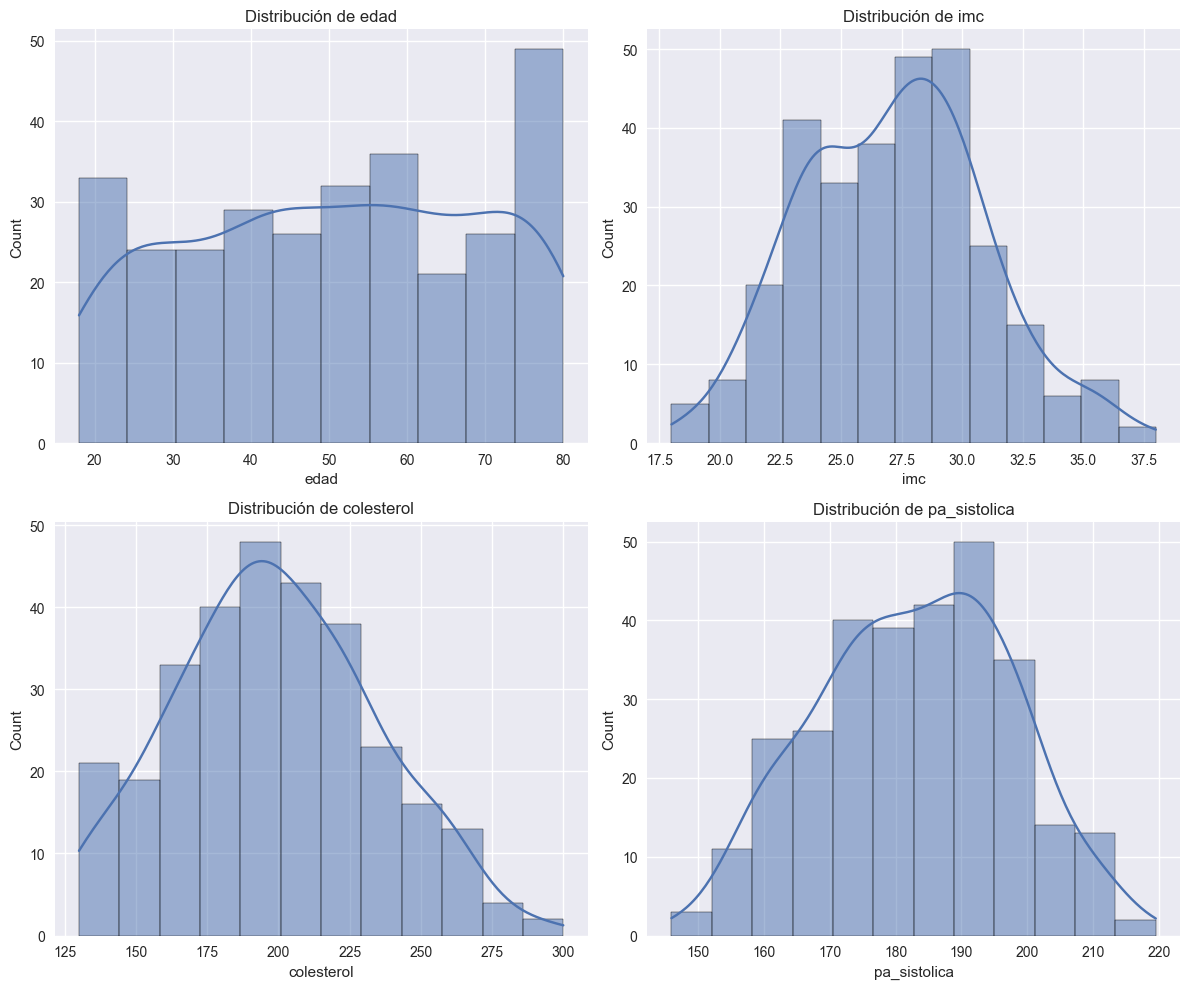

In [25]:
#5. Visualización de distribuciones

plt.figure(figsize=(12, 10))
for i, col in enumerate(['edad', 'imc', 'colesterol', 'pa_sistolica'], 1):
        plt.subplot(2, 2, i)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribución de {col}')
        plt.tight_layout()
        plt.savefig('distribucion_variables_pa.png')

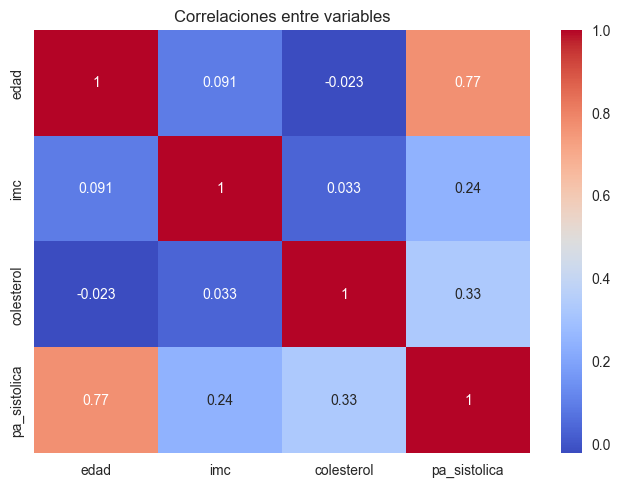

In [26]:
#6. Matriz de correlación

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlaciones entre variables')
plt.savefig('correlacion_pa.png')

In [28]:
#7. Regresión lineal simple

for predictor in ['edad', 'imc', 'colesterol']:
    X = df[predictor].values.reshape(-1, 1)
    y = df['pa_sistolica'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
    random_state=42)
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

In [29]:
# 8. Regresión lineal múltiple

X_multi = df[['edad', 'imc', 'colesterol']]
y = df['pa_sistolica']
modelo_multi = LinearRegression()
modelo_multi.fit(X_train, y_train)
y_pred_multi = modelo_multi.predict(X_test)

In [30]:
#9. Predicción para nuevos pacientes

def predecir_pa_sistolica(edad, imc, colesterol, modelo=modelo_multi):
    paciente = pd.DataFrame([[edad, imc, colesterol]], columns=['edad', 'imc','colesterol'])
    pa_predicha = modelo.predict(paciente)[0]
    return pa_predicha

In [ ]:
'''#punto 4 del profe

#. Regresión Lineal Múltiple:
○ Construye un modelo de regresión múltiple usando edad, imc y
colesterol como predictores.
○ Realiza el mismo procedimiento de división de datos,
entrenamiento, predicción y evaluación.
○ Obtén y analiza los coeficientes de cada variable

#Regresion lineal multiple

X_multi = df[predictores]   
y = df["pa_sistolica"]

#dividimos
X_train_multi, X_test_multi, y_train, y_test = train_test_split(X_multi, y, test_size=0.3, random_state=42)

#creamos y entrenamos el modelo
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train)

#realizamos las predicciones
y_pred_multi = model_multi.predict(X_test)  

#evaluamos el modelo
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print(f"\nResultados de regresion múltiple: {mse_multi:.2f}")
print(f'MSE: {mse_multi:.2f}')
print(f'R: {r2_multi:.4f}')
print('Coeficientes:')
for i, predictor in enumerate(predictores):
    print(f"-{predictor}: {model_multi.coef_[i]:.4f}")

print(f'Intercepto: {model_multi.intercept_:.4f}')
'''